In [129]:
import numpy as np
import matplotlib.pyplot as plt
import sys

import const

from pp import read, plot_traj


In [130]:
SCAT, BREM, EXC, ION, BTURB = 0, 1, 2, 3, 4


In [ ]:
id_list, data = read('../../scratch/strongB/data')


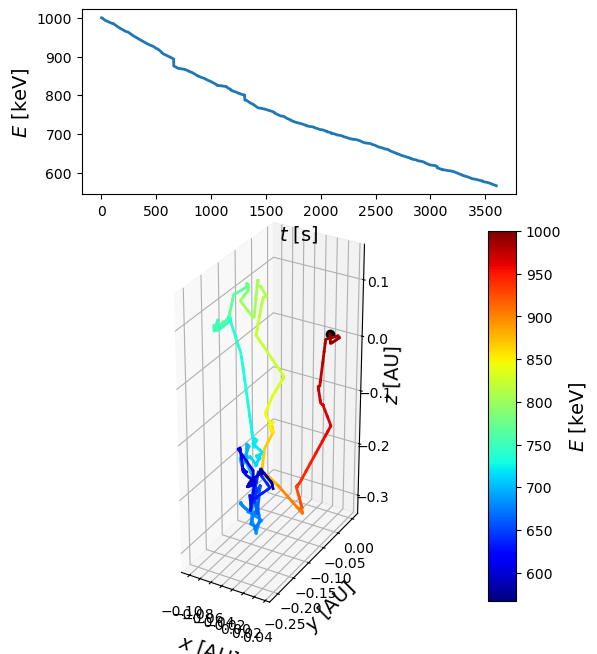

In [251]:
idx = 500

#plot_traj(data, 1, var_c=data.time, unit_c=1., cbar_label=r'$t$ [${\rm s}$]', cval=0, do_top=False)
plot_traj(data[idx], var_c=data[idx].ener, unit_c=1e3, cbar_label=r'$E$ [${\rm keV}$]', cval=1000000, do_top=True)


Text(0.5, 1.0, 'Energy Loss by Different Mechanisms')

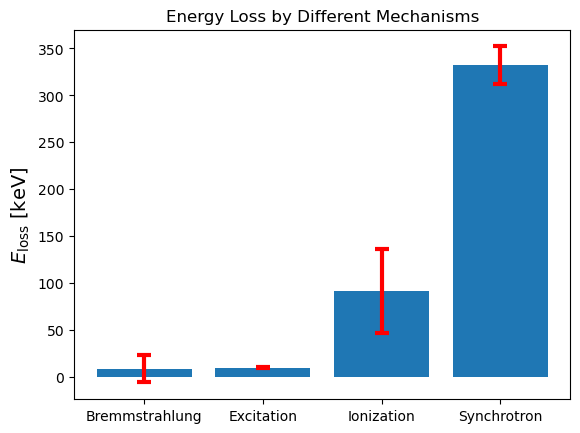

In [322]:
fig, ax = plt.subplots()

npart = 0
ener_loss_list = [[], [], [], []]

for i, data_1part in enumerate(data):
    
    if id_list[i] > 1000000: continue
    
    for i, interaction in enumerate([BREM, EXC, ION]):
        cond = data_1part.interaction==interaction
        ener_loss_list[i].append(np.sum(data_1part.ener_loss[cond]))
    ener_loss_list[-1].append(np.sum(data_1part.ener_loss_sync))
    npart += 1    
ener_loss_list = np.array(ener_loss_list)
    
ener_loss_list_avg = np.sum(ener_loss_list, axis=1) / npart
ener_loss_list_std = np.sqrt(np.sum((ener_loss_list-ener_loss_list_avg[:,None])**2, axis=1) / npart)
    
ax.bar(np.arange(4), ener_loss_list_avg/1e3)
ax.errorbar(np.arange(4), ener_loss_list_avg/1e3, yerr=ener_loss_list_std/1e3, color='red', zorder=1, linestyle='', capsize=5, elinewidth=3, capthick=3)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Bremmstrahlung', 'Excitation', 'Ionization', 'Synchrotron'])

plt.ylabel(r'$E_{\rm loss}$ [${\rm keV}$]', fontsize=14)
plt.title('Energy Loss by Different Mechanisms')


Text(0.5, 1.0, 'Number of Ionizations per Element')

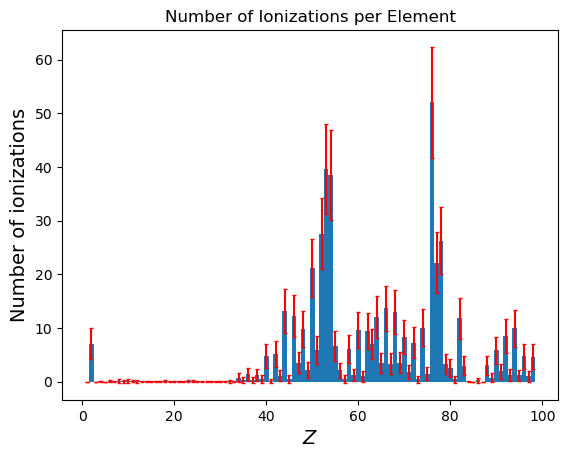

In [318]:
fig, ax = plt.subplots()

Zelem_bins = np.arange(0.5, 99.5)
Zelem = (Zelem_bins[1:] + Zelem_bins[:-1]) / 2

npart = 0
nion_list = []

for data_1part in data:
    nion_1part, _ = np.histogram(data_1part.Zelem[data_1part.interaction==ION], bins=Zelem_bins)
    nion_list.append(nion_1part)
    npart += 1
nion_list = np.array(nion_list)
    
nion_avg = np.sum(nion_list, axis=0) / npart
nion_std = np.sqrt(np.sum((nion_list-nion_avg)**2, axis=0) / npart)

ax.bar(Zelem, nion_avg, width=1)
ax.errorbar(Zelem, nion_avg, yerr=nion_std, color='red', zorder=1, linestyle='', capsize=1.5)

ax.set_xlabel(r'$Z$', fontsize=14)
ax.set_ylabel(r'Number of ionizations', fontsize=14)
ax.set_title('Number of Ionizations per Element')


Text(0.5, 1.0, 'Spectrum of Secondary Electrons Produced by Ionization')

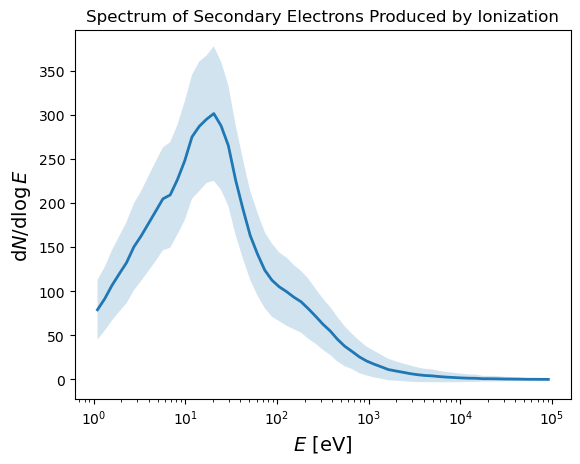

In [343]:
fig, ax = plt.subplots()

num = 64
ener_bins = np.logspace(0, 5, num)
ener = (ener_bins[1:] + ener_bins[:-1]) / 2

npart = 0
nsec_list = []

for data_1part in data:
    ener_sec_1part = data_1part.ener_sec[data_1part.interaction==ION]
    nsec_1part, _ = np.histogram(ener_sec_1part, bins=ener_bins)
    nsec_list.append(nsec_1part)
    npart += 1
nsec_list = np.array(nsec_list)

nsec_avg = np.sum(nsec_list, axis=0) / npart
nsec_std = np.sqrt(np.sum((nsec_list-nsec_avg)**2, axis=0) / npart)
dlogE = np.log10(ener_bins)[1:] - np.log10(ener_bins)[:-1]

ax.plot(ener, nsec_avg/dlogE, lw=2)
ax.fill_between(ener, (nsec_avg-nsec_std)/dlogE, (nsec_avg+nsec_std)/dlogE, lw=2, alpha=0.2)
ax.set_xscale('log')

ax.set_xlabel(r'$E$ $[{\rm eV}]$', fontsize=14)
ax.set_ylabel(r'${\rm d}N/{\rm d}\log E$', fontsize=14)
ax.set_title('Spectrum of Secondary Electrons Produced by Ionization')
    

Text(0.5, 1.0, 'Energy Loss Rate vs. Time')

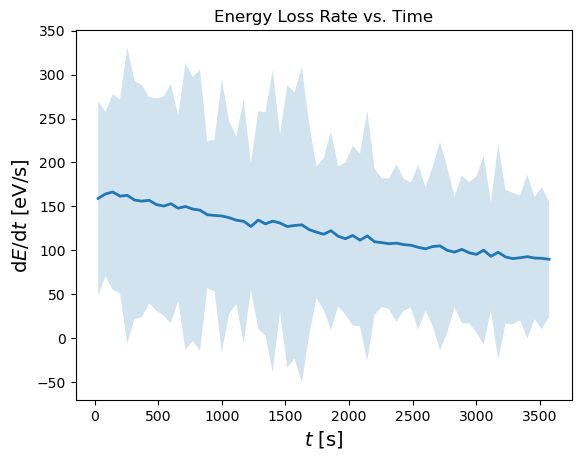

In [350]:
fig, ax = plt.subplots()

tmax = 3600
num = 64
time_bins = np.linspace(0, 3600, num)
time = (time_bins[:-1] + time_bins[1:]) / 2

npart = 0
ener_loss_list = []

for i, data_1part in enumerate(data):
    if id_list[i] > 1000000: continue
    ener_loss_1part = data_1part.ener_loss + data_1part.ener_loss_sync
    ener_loss_1part, _ = np.histogram(data_1part.time, weights=ener_loss_1part, bins=time_bins)
    ener_loss_list.append(ener_loss_1part)
    npart += 1
ener_loss_list = np.array(ener_loss_list)

ener_loss_avg = np.sum(ener_loss_list, axis=0) / npart
ener_loss_std = np.sqrt(np.sum((ener_loss_list-ener_loss_avg)**2, axis=0) / npart)
dt = time_bins[1:] - time_bins[:-1]
    
ax.plot(time, ener_loss_avg/dt, lw=2)
ax.fill_between(time, (ener_loss_avg-ener_loss_std)/dt, (ener_loss_avg+ener_loss_std)/dt, lw=2, alpha=0.2)

ax.set_xlabel(r'$t$ $[{\rm s}]$', fontsize=14)
ax.set_ylabel(r'${\rm d}E/{\rm d}t$ $[{\rm eV/s}]$', fontsize=14)
ax.set_title('Energy Loss Rate vs. Time')


Text(0.5, 1.0, 'Energy Deposition vs. Distance')

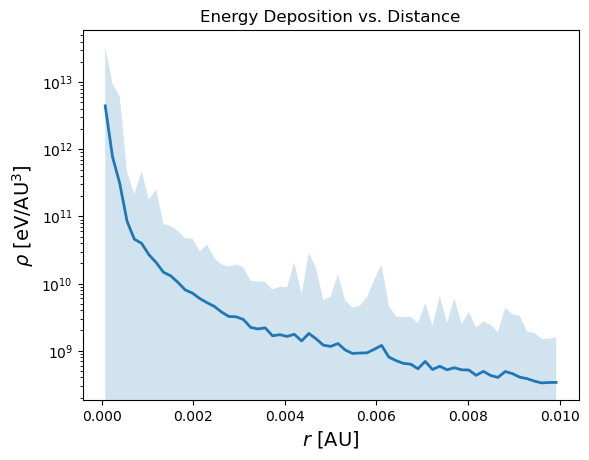

In [355]:
fig, ax = plt.subplots()

dis_max = 0.01*const.AU
num = 64
dis_bins = np.linspace(0, dis_max, num)
dis = (dis_bins[1:] + dis_bins[:-1]) / 2

npart = 0
ener_loss_list = []

for i, data_1part in enumerate(data):

    if id_list[i] > 100000: continue
    
    dis_ev = np.sqrt(data_1part.x**2+data_1part.y**2+data_1part.z**2)
    ener_loss_ev = data_1part.ener_loss + data_1part.ener_loss_sync
    ener_loss_1part, _ = np.histogram(dis_ev, weights=ener_loss_ev, bins=dis_bins)
    ener_loss_list.append(ener_loss_1part)
    npart += 1
    
ener_loss_avg = np.sum(ener_loss_list, axis=0) / npart
ener_loss_std = np.sqrt(np.sum((ener_loss_list-ener_loss_avg)**2, axis=0) / npart)
dV = (dis_bins[1:] - dis_bins[:-1]) * 4*np.pi*dis**2
    
ax.plot(dis/const.AU, ener_loss_avg/dV/(1/const.AU**3), lw=2)
ax.fill_between(dis/const.AU, (ener_loss_avg-ener_loss_std)/dV/(1/const.AU**3), (ener_loss_avg+ener_loss_std)/dV/(1/const.AU**3), alpha=0.2)
ax.set_yscale('log')

ax.set_xlabel(r"$r$ [${\rm AU}$]", fontsize=14)
ax.set_ylabel(r"$\rho$ [${\rm eV/AU^3}$]", fontsize=14)
ax.set_title('Energy Deposition vs. Distance')
